***Половников Никита***

# ДЗ 1 ML Кейсы

## Задание 1

2) Сделать сравнение табличных unsupervised детекторов аномалий (не менее 5) по метрике AP на одном из датасетов на выбор: синтетический и реальный.

        а) Загрузка и анализ датасета. Содержится минимум 3 ячейки с разведочным анализом данных (например, кол-во наблюдений в каждой группе таргета) 
        б) Инициализация всех алгоритмов. 
        г) Обучение всех алгоритмов. В ячейке с обучением модели сохранен лог(вывод) процесса обучения. 
        д) Вывод метрики для всех алгоритмов на тестовой выборке в единую табличку. Размер тестовой выборки должен составлять не менее 20% от исходной выборки

### Импорт необходимых бибилиотек

In [1]:
import numpy as np
import pandas as pd
import pyod
from pyod.models.hbos import HBOS as HBOS_pyod
from pyod.models.lof import LOF as LOF_pyod
from pyod.models.iforest import IForest as IForest_pyod
from pyod.models.knn import KNN as KNN_pyod
from pyod.models.copod import COPOD as COPOD_pyod
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import time
from warnings import filterwarnings

filterwarnings('ignore')

### EDA

In [2]:
data = pd.read_csv('creditcard.csv')
X, ground_truth = data.drop('Class', axis = 1).copy(), data['Class']

In [3]:
data.shape

(284807, 31)

In [4]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='Count'>

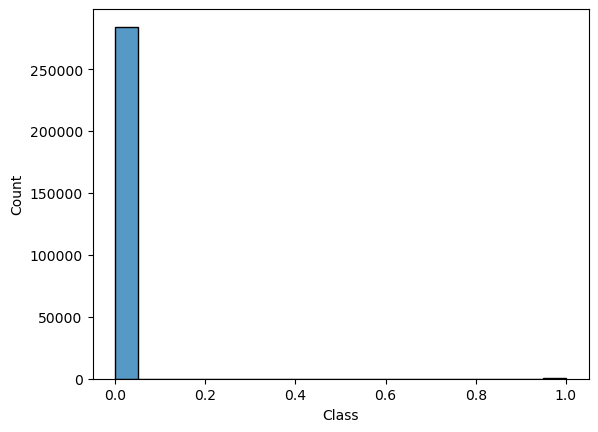

In [6]:
sns.histplot(data['Class'])

Набор данных содержит 284 807 строк, пропущенных значений нет. 


Имеется сильный дисбаланс классов: количество строк, представляющих законные транзакции (Class=0), и количество строк, представляющих фродовые транзакции (Class=1).

### Сравнение моделей

Для сравнения были выбраны следующие модели:

1. **Local Outlier Factor (LOF)**
- **Описание**: LOF оценивает локальную плотность каждого экземпляра данных и сравнивает ее с плотностью его соседей. Точки, которые имеют значительно более низкую плотность по сравнению с их соседями, считаются аномальными.


2. **K-Nearest Neighbors (KNN)**

- **Описание**: KNN для обнаружения аномалий использует расстояние до k-го ближайшего соседа для определения степени аномальности точки. Чем больше это расстояние, тем больше вероятность, что точка является аномальной.
 
3. **Isolation Forest (IForest)**

- **Описание**: Isolation Forest строит множество случайных деревьев для изоляции точек данных. Аномальные точки изолируются быстрее, так как они находятся в менее плотных областях данных.

4. **Histogram-based Outlier Score (HBOS)**

- **Описание**: HBOS строит гистограммы для каждого признака и вычисляет аномалии на основе распределения данных в этих гистограммах. Точки, которые попадают в редко встречающиеся бины гистограммы, считаются аномальными.

5. **Copula-Based Outlier Detection (COPOD)**

- **Описание**: COPOD использует теорию копул для моделирования многомерных данных и выявления аномалий на основе кумулятивных распределений. Он оценивает вероятность, с которой точка может быть аномальной, основываясь на распределении данных.


In [7]:
# Словарь для хранения моделей
models = {
    "LOF": LOF_pyod(),
    "KNN": KNN_pyod(),
    "IForest": IForest_pyod(),
    "HBOS": HBOS_pyod(),
    "COPOD": COPOD_pyod()
}

In [8]:
# Функция для оценки модели
def evaluate_model(model, X_train, y_train):
    model.fit(X_train)
    y_train_scores = model.decision_function(X_train)
    ap_score = average_precision_score(y_train,y_train_scores)
    return ap_score

In [9]:
# Словарь для хранения результатов
results = {}

# Оценка каждой модели
for model_name, model in models.items():
    ap_score = evaluate_model(model, X, ground_truth)
    results[model_name] = ap_score
    print(f" Model name: {model_name}\n Average Precision = {ap_score:.4f} \n")


 Model name: LOF
 Average Precision = 0.0178 

 Model name: KNN
 Average Precision = 0.0051 

 Model name: IForest
 Average Precision = 0.1127 

 Model name: HBOS
 Average Precision = 0.2366 

 Model name: COPOD
 Average Precision = 0.2449 



**Таблица качества обучения (AP)**

| **Algo** | **pyod** |
|:---:|:---:|
| **LOF** |  0.0178 |  
| **KNN** |  0.0050 |  
| **PCA** | 0.1127  |   
| **HBOS** |  0.2366 | 
| **ABOD** | 0.2448  | 

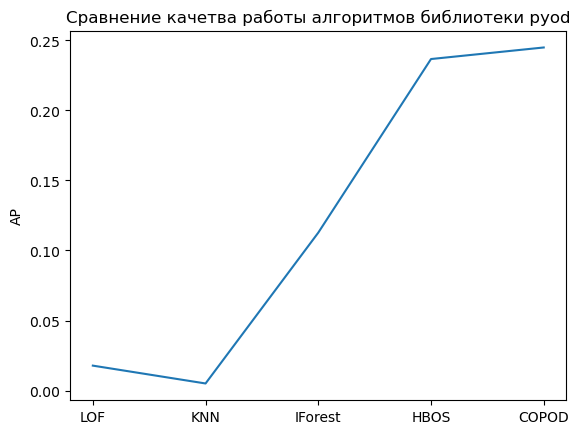

In [11]:
res_list = results.items()
x, y = zip(*res_list)

plt.plot(x, y)
plt.title('Сравнение качетва работы алгоритмов библиотеки pyod')
plt.ylabel('AP')
plt.show()

## Задание 2

2) Cравнить быстродействия PYOD vs PYTOD для минимум 5 алгоритмов на ваш выбор.

        а) Загрузка и анализ датасета. Содержится минимум 3 ячейки с разведочным анализом данных (например, кол-во наблюдений в каждой группе таргета)
        б) Инициализация всех алгоритмов.
        г) Обучение всех алгоритмов. В ячейке с обучением модели сохранен лог(вывод) процесса обучения.
        д) Вывод скорости обучения и предсказания для всех алгоритмов в единую табличку

### Импорт необходимых бибилиотек

In [12]:
from pytod.models.hbos import HBOS as HBOS_pytod
from pytod.models.lof import LOF as LOF_pytod
from pytod.models.knn import KNN as KNN_pytod
from pytod.models.pca import PCA as PCA_pytod
from pytod.models.abod import ABOD as ABOD_pytod

from pyod.models.pca import PCA as PCA_pyod
from pyod.models.abod import ABOD as ABOD_pyod

import torch

### EDA

In [13]:
data = pd.read_csv('creditcard.csv')
X, ground_truth = data.drop('Class', axis = 1).copy(), data['Class']

### Импорт необходимых бибилиотек

In [14]:
data.shape

(284807, 31)

In [15]:
data.isna().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='Count'>

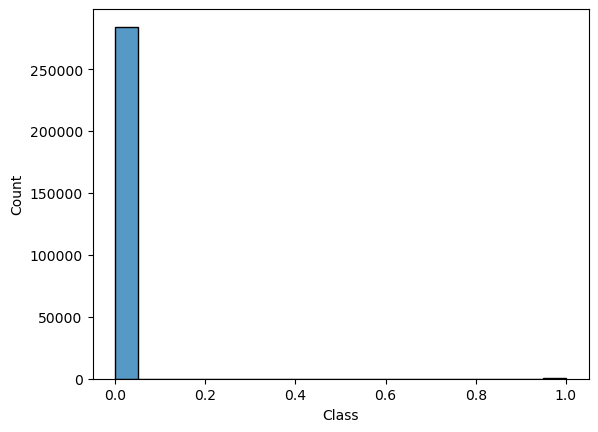

In [17]:
sns.histplot(data['Class'])

Набор данных содержит 284 807 строк, пропущенных значений нет. 


Имеется сильный дисбаланс классов: количество строк, представляющих законные транзакции (Class=0), и количество строк, представляющих фродовые транзакции (Class=1).

In [18]:
pyod_models = {
    "LOF": LOF_pyod(),
    "KNN": KNN_pyod(),
    "PCA": PCA_pyod(),
    "HBOS": HBOS_pyod(),
    "ABOD": ABOD_pyod()
}

pytod_models = {
    "LOF": LOF_pytod(device='cuda'),
    "KNN": KNN_pytod(device='cuda'),
    "PCA": PCA_pytod(device='cuda'),
    "HBOS": HBOS_pytod(device='cuda'),
    "ABOD": ABOD_pytod(device='cuda')
}

In [19]:
X = X.astype('float32')

In [20]:
ground_truth = ground_truth.astype('int8')

In [21]:
# Функция для оценки модели
def evaluate_model(model, X_train, y_train, times):
    stime = time.time()
    model.fit(X_train)
    times[model_name] = (time.time() - stime)
    y_train_scores = model.decision_scores_.ravel()
    y_train_scores = np.nan_to_num(y_train_scores)
    ap_score = average_precision_score(y_train, y_train_scores)
    
    return ap_score

In [22]:
# Словарь для хранения результатов
results_pyod = {}
times_pyod  = {}

# Оценка каждой модели
for model_name, model in pyod_models.items():
    ap_score = evaluate_model(model, X[:35000], ground_truth[:35000], times_pyod)
    results_pyod[model_name] = ap_score
    print(f" Model name: {model_name}\n Average Precision = {ap_score:.4f} \n")

 Model name: LOF
 Average Precision = 0.0110 

 Model name: KNN
 Average Precision = 0.0088 

 Model name: PCA
 Average Precision = 0.2540 

 Model name: HBOS
 Average Precision = 0.3741 

 Model name: ABOD
 Average Precision = 0.0198 



In [23]:
X_pytod, ground_truth_pytod = torch.from_numpy(X[:35000].values), torch.from_numpy(ground_truth[:35000].values)

In [24]:
# Оценка каждой модели
results_pytod = {}
times_pytod  = {}

for model_name, model in pytod_models.items():
    ap_score = evaluate_model(model, X_pytod, ground_truth_pytod, times_pytod)
    results_pytod[model_name] = ap_score
    print(f" Model name: {model_name}\n Average Precision = {ap_score:.4f} \n")


 Model name: LOF
 Average Precision = 0.0080 

 Model name: KNN
 Average Precision = 0.0086 

 Model name: PCA
 Average Precision = 0.0023 

 Model name: HBOS
 Average Precision = 0.3741 

 Model name: ABOD
 Average Precision = 0.0037 



**Таблица качества обучения (AP)**

| **Algo** | **pyod** | **pytod** | 
|:---:|:---:|:---:|
| **LOF** |  0.0110 | 0.0080 | 
| **KNN** |  0.0088 | 0.0086 | 
| **PCA** | 0.2540  | 0.23 |  
| **HBOS** |  0.3741 | 0.3741  | 
| **ABOD** | 0.0198  | 0.0037  | 

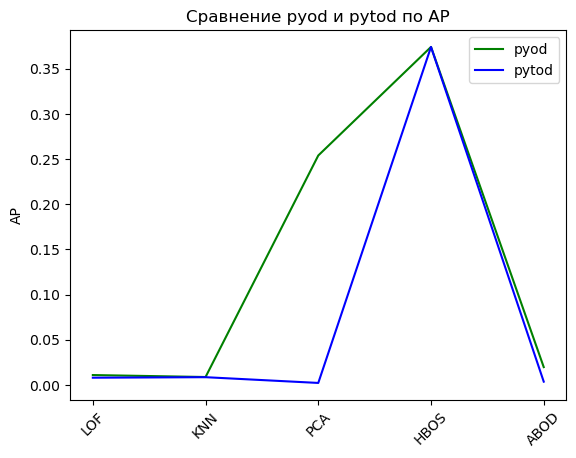

In [25]:
res_c_list = results_pyod.items()
x, y = zip(*res_c_list)

plt.plot(x, y, color='green', label='pyod')

res_c_list_t = results_pytod.items()
x_t, y_t = zip(*res_c_list_t)

plt.plot(x_t, y_t, color='blue', label='pytod')

plt.xticks(rotation=45)
plt.title('Сравнение pyod и pytod по AP')
plt.ylabel('AP')
plt.legend()
plt.show()

**Таблица времен обучения**

| **Algo** | **pyod** | **pytod** | 
|:---:|:---:|:---:|
| **LOF** | 6.42 | 2.35 | 
| **KNN** | 3.47 | 1.27 | 
| **PCA** | 0.10 | 0.23 |  
| **HBOS** |  2.15 | 0.21 | 
| **ABOD** | 9.05 | 4.47 | 

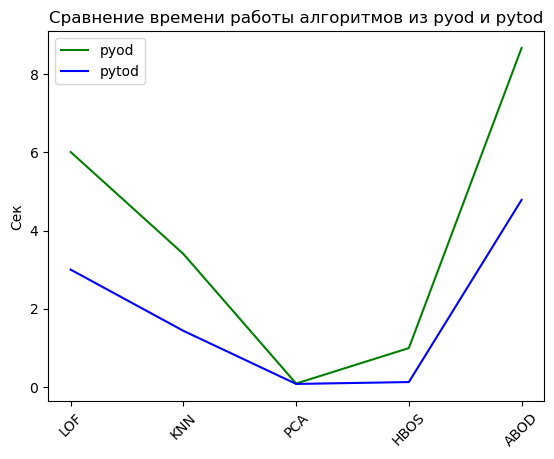

In [26]:
times_list = times_pyod.items()
x, y = zip(*times_list)

plt.plot(x, y, color='green', label='pyod')

times_list_t = times_pytod.items()
x_t, y_t = zip(*times_list_t)

plt.plot(x_t, y_t, color='blue', label='pytod')

plt.xticks(rotation=45)
plt.title('Сравнение времени работы алгоритмов из pyod и pytod')
plt.ylabel('Сек')
plt.legend()
plt.show()